<a href="https://colab.research.google.com/github/younghoonNa/Movie_Review_DACON/blob/main/%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#모두 실행


## 실행에 필요한 코드

In [ ]:
# 라이브러리 설치
!pip install gdrive_dataset

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.1 MB 49 kB/s 


In [ ]:
!pip3 install ngboost

     |████████████████████████████████| 348 kB 7.6 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=ddeb2f04ecb456288bbbd8a78319f73b532332cc2d97b7b906142489f3baf27c
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
#https://drive.google.com/file/d/1korokEjnq76DP_igBYoukf86tpE5RIui/view
from gdrivedataset import loader

file_id = "1korokEjnq76DP_igBYoukf86tpE5RIui"
loader.load_from_google_drive(file_id)

========== files ============

data/train.csv
data/test.csv
data/sample_submission.csv



In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
#기본 모듈은 numpy 그리고 pandas 사용.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, Normalizer,RobustScaler
from scipy.stats import randint, uniform

#분류/Classifier 사용에 필요한 모델 import 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#Regressor에 필요한 모델 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import HuberRegressor
from ngboost import NGBRegressor
from sklearn.linear_model import LassoLars


## 시작

### Train Test 데이터 load

In [ ]:
train = pd.read_csv('/content/data/train.csv')
train = train.iloc[: ,1:]
train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [ ]:
test = pd.read_csv('/content/data/test.csv')
test

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [ ]:
sample_submission = pd.read_csv('/content/data/sample_submission.csv')
sample_submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1345,1346,0
1346,1347,0
1347,1348,0
1348,1349,0


### 결측값 및 중복값 제거

In [ ]:
train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [ ]:
test.isna().sum()

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

In [ ]:
# 중복값 제거
print("제거 전 :", train.shape)
train = train.drop_duplicates()
print("제거 후 :", train.shape)

제거 전 : (1350, 14)
제거 후 : (1349, 14)


### 특성 분류

In [ ]:
train.info()
# id : 데이터 고유 id
# OverallQual : 전반적 재료와 마감 품질
# YearBuilt : 완공 연도
# YearRemodAdd : 리모델링 연도
# ExterQual : 외관 재료 품질
# BsmtQual : 지하실 높이
# TotalBsmtSF : 지하실 면적 
# 1stFlrSF : 1층 면적 
# GrLivArea : 지상층 생활 면적
# FullBath : 지상층 화장실 개수 
# KitchenQual : 부억 품질 
# GarageYrBlt : 차고 완공 연도
# GarageCars: 차고 자리 개수
# GarageArea: 차고 면적 
# target : 집값(달러 단위)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1349 non-null   int64 
 1   Gr Liv Area     1349 non-null   int64 
 2   Exter Qual      1349 non-null   object
 3   Garage Cars     1349 non-null   int64 
 4   Garage Area     1349 non-null   int64 
 5   Kitchen Qual    1349 non-null   object
 6   Total Bsmt SF   1349 non-null   int64 
 7   1st Flr SF      1349 non-null   int64 
 8   Bsmt Qual       1349 non-null   object
 9   Full Bath       1349 non-null   int64 
 10  Year Built      1349 non-null   int64 
 11  Year Remod/Add  1349 non-null   int64 
 12  Garage Yr Blt   1349 non-null   int64 
 13  target          1349 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.1+ KB


### 범주형 데이터 처리하기

1. 범주형 데이터 Exter Qual , Kitchen Qual , Bsmt Qual 처리하기
2. Ex -> 5, Gd-> 4, Ta->3, Fa->2, Po ->1

#### Exter Qual, Kitchen Qual, Bsmt Qual

In [ ]:
train['Exter Qual'].value_counts()

TA    807
Gd    485
Ex     49
Fa      8
Name: Exter Qual, dtype: int64

In [ ]:
train['Kitchen Qual'].value_counts()

TA    659
Gd    560
Ex    107
Fa     23
Name: Kitchen Qual, dtype: int64

In [ ]:
train['Bsmt Qual'].value_counts()

TA    605
Gd    582
Ex    133
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64

#### 범주형 데이터 -> 각 각 값에 맞는 숫자로 변환.

In [ ]:
#apply 함수 사용.
def trans(x):
  if x == "Ex": return 5
  elif x=='Gd' : return 4
  elif x=='TA' : return 3
  elif x=='Fa' : return 2
  elif x=='Po' : return 1

In [ ]:
train['Exter Qual mapping'] = train['Exter Qual'].apply(trans)
train['Exter Qual mapping'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    807
4    485
5     49
2      8
Name: Exter Qual mapping, dtype: int64

In [ ]:
train['Kitchen Qual mapping'] = train['Kitchen Qual'].apply(trans)
train['Kitchen Qual mapping'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    659
4    560
5    107
2     23
Name: Kitchen Qual mapping, dtype: int64

In [ ]:
train['Bsmt Qual mapping'] = train['Bsmt Qual'].apply(trans)
train['Bsmt Qual mapping'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    605
4    582
5    133
2     28
1      1
Name: Bsmt Qual mapping, dtype: int64

### test 데이터도 범주형 데이터 처리

In [ ]:
test['Exter Qual'].value_counts(), test['Kitchen Qual'].value_counts(), test['Bsmt Qual'].value_counts()

(TA    794
 Gd    489
 Ex     58
 Fa      9
 Name: Exter Qual, dtype: int64, TA    666
 Gd    566
 Ex     94
 Fa     23
 Po      1
 Name: Kitchen Qual, dtype: int64, Gd    597
 TA    582
 Ex    124
 Fa     46
 Po      1
 Name: Bsmt Qual, dtype: int64)

In [ ]:
test['Exter Qual mapping'] = test['Exter Qual'].apply(trans)
test['Exter Qual mapping'].value_counts()

3    794
4    489
5     58
2      9
Name: Exter Qual mapping, dtype: int64

In [ ]:
test['Kitchen Qual mapping'] = test['Kitchen Qual'].apply(trans)
test['Kitchen Qual mapping'].value_counts()

3    666
4    566
5     94
2     23
1      1
Name: Kitchen Qual mapping, dtype: int64

In [ ]:
test['Bsmt Qual mapping'] = test['Bsmt Qual'].apply(trans)
test['Bsmt Qual mapping'].value_counts()

4    597
3    582
5    124
2     46
1      1
Name: Bsmt Qual mapping, dtype: int64

#### 서로 상관관계가 높은 train['1st Flr SF'] + train['Total Bsmt SF'] 하나로 합쳐줌.

In [ ]:
# train['sum of house'] = train['1st Flr SF'] + train['Total Bsmt SF']
# test['sum of house'] = test['1st Flr SF'] + test['Total Bsmt SF']

# train['sum of house'] , test['sum of house']

### Ex, TA Gd 사용 O X -> 점수로 변환. // 따라서 주석 처리 

##### 다른 인코딩 방법

In [ ]:
# cat_cols = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

In [ ]:
# for c in cat_cols :
#     ord_df = train.groupby(c).target.median().reset_index(name = f'ord_{c}')
#     train = pd.merge(train, ord_df, how = 'left')
#     test = pd.merge(test, ord_df, how = 'left')

In [ ]:
# train

##### Exter Qual 사용여부

In [ ]:
# train['Use EQ Ex'] = train[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'Ex' or x['Kitchen Qual'] == 'Ex' or x['Bsmt Qual'] == 'Ex'] , axis=1)

# train['Use EQ Ex'].value_counts()

In [ ]:
# train['Use EQ Ex'] = train[['Exter Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'TA'], axis=1)

# train['Use EQ Ex'].value_counts()

##### Kitchen Qual 사용여부

In [ ]:
# train.loc[train['Kitchen Qual'] == 'TA', :]['target'].mean() , train.loc[train['Kitchen Qual'] != 'TA', :]['target'].mean()

In [ ]:
# train.loc[train['Kitchen Qual'] == 'Gd', :]['target'].mean() , train.loc[train['Kitchen Qual'] != 'Gd', :]['target'].mean()

In [ ]:
# train.loc[train['Kitchen Qual'] == 'Ex', :]['target'].mean() , train.loc[train['Kitchen Qual'] != 'Ex', :]['target'].mean()

In [ ]:
# train.loc[train['Kitchen Qual'] == 'Fa', :]['target'].mean() , train.loc[train['Kitchen Qual'] != 'Fa', :]['target'].mean()

In [ ]:
# train['Use KQ Ex'] = train[['Kitchen Qual']].apply(lambda x: (0, 1)\
                                          # [x['Kitchen Qual'] == 'Ex'], axis=1)

# train['Use KQ Ex'].value_counts()

##### Bsmt Qual

In [ ]:
# train['Use Gd'] = train[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'Gd' or x['Kitchen Qual'] == 'Gd' or x['Bsmt Qual'] == 'Gd'], axis=1)

# train['Use Gd'].value_counts()

In [ ]:
# test['Use Gd'] = test[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'Gd' or x['Kitchen Qual'] == 'Gd' or x['Bsmt Qual'] == 'Gd'], axis=1)

# test['Use Gd'].value_counts()

In [ ]:
# train['Use Fa'] = train[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'Fa' or x['Kitchen Qual'] == 'Fa' or x['Bsmt Qual'] == 'Fa'], axis=1)

# train['Use Fa'].value_counts()

In [ ]:
# train['Use KQ Ex'] = train[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Kitchen Qual'] == 'Ex'], axis=1)

# train['Use KQ Ex'].value_counts()

In [ ]:
# train['Use EQ Ex'] = train[['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].apply(lambda x: (0, 1)\
#                                           [x['Exter Qual'] == 'Ex'], axis=1)

# train['Use EQ Ex'].value_counts()

In [ ]:
# train['Use EQ Ex']

##### 인코딩.

In [ ]:
# eq = pd.get_dummies(train['Exter Qual'], prefix='EQ', prefix_sep='_')
# kq = pd.get_dummies(train['Kitchen Qual'],prefix='KQ', prefix_sep='_')
# bq = pd.get_dummies(train['Bsmt Qual'],prefix='BQ', prefix_sep='_')

# train = pd.concat((train, eq), axis=1)
# train = pd.concat((train, kq), axis=1)
# train = pd.concat((train, bq), axis=1)

# train.head()

In [ ]:
# eq = pd.get_dummies(test['Exter Qual'], prefix='EQ', prefix_sep='_')
# kq = pd.get_dummies(test['Kitchen Qual'],prefix='KQ', prefix_sep='_')
# bq = pd.get_dummies(test['Bsmt Qual'],prefix='BQ', prefix_sep='_')

# test = pd.concat((test, eq), axis=1)
# test = pd.concat((test, kq), axis=1)
# test = pd.concat((test, bq), axis=1)

# test.head()

### Garage Yr blt 2200년 수정

In [ ]:
train.loc[train['Garage Yr Blt']> 2050, 'Garage Yr Blt'] = 2007

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## GroupBy를 통한 새로운 특성을 만들어보자

0.   id              1350 non-null   int64 
1.   Overall Qual    1350 non-null   int64 
2.  Gr Liv Area     1350 non-null   int64 
3. Exter Qual      1350 non-null   object
4.   Garage Cars     1350 non-null   int64 
5.  Garage Area     1350 non-null   int64 
6.   Kitchen Qual    1350 non-null   object
7.   Total Bsmt SF   1350 non-null   int64 
8.   1st Flr SF      1350 non-null   int64 
9.   Bsmt Qual       1350 non-null   object
10.  Full Bath       1350 non-null   int64 
11.  Year Built      1350 non-null   int64 
12.  Year Remod/Add  1350 non-null   int64 
13.  Garage Yr Blt   1350 non-null   int64 
14.  target          1350 non-null   int64 

In [ ]:
# train.loc[:, 'car/area'] = train.loc[:, 'Garage Area'] * train.loc[:, 'Garage Cars']
# train['car/area'] = np.round(train['car/area'])

In [ ]:
def feature_eng(data_):
  data = data_.copy()
  data['Year Gap Remod'] = data['Year Remod/Add'] - data['Year Built']
  data['Car Area'] = data['Garage Area'] / data['Garage Cars']
  data['2nd flr SF'] = data['Gr Liv Area'] - data['1st Flr SF']
  data['2nd flr'] = data['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
  data['Total SF'] = data[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
  data['Sum Qual'] = data[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
  data['Garage InOut'] = data.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)
  return data

train = feature_eng(train)
test = feature_eng(test)

In [ ]:
# # train['sum of house'] = train['1st Flr SF'] + train['Total Bsmt SF'] 
# # test['sum of house'] = test['1st Flr SF'] + test['Total Bsmt SF']
# train['total of house'] = train['sum of house'] + train['Garage Area']
# test['total of house'] = test['sum of house'] + test['Garage Area']
# train['total of house']

In [ ]:
# train.loc[:, 'area/3.3'] = train.loc[:, 'Gr Liv Area'] / 3.3
# test.loc[:, 'area/3.3'] = test.loc[:, 'Gr Liv Area'] / 3.3

# train['area/3.3'] =  np.round(train['area/3.3'])
# test['area/3.3'] =  np.round(test['area/3.3'])

In [ ]:
# train.loc[train['target'] < 100000, :]

In [ ]:
# train.loc[train['Overall Qual'] < 7, 'target'].mean()

In [ ]:
# train.loc[train['Overall Qual'] >= 10, 'target'].mean()

In [ ]:
# train

In [ ]:
# train.loc[train['Overall Qual'] >= 5, 'target'].mean()

## 시각화

##### 시각화 전 필요 없는 특성 drop

In [ ]:
# train_data = train.drop(columns = ['1st Flr SF', 'Total Bsmt SF'], axis=1)
# train_data = train.drop(columns = '1st Flr SF', axis=1)
# train_data = train.drop(columns = 'Total Bsmt SF', axis=1)

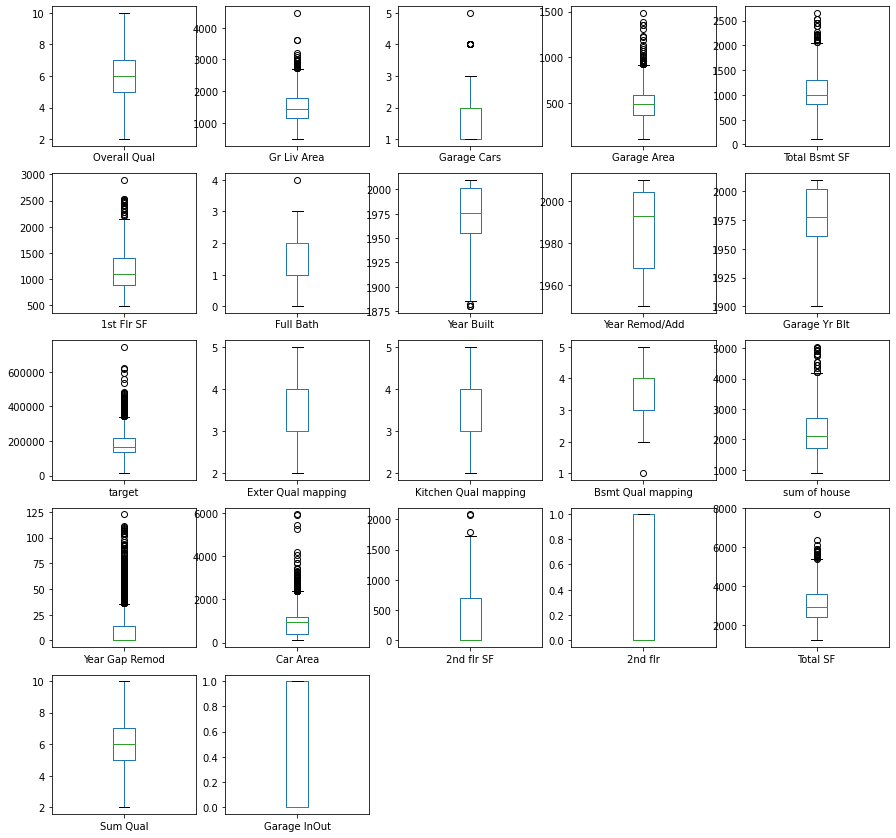

In [ ]:
# 각 컬럼별 BoxPlot
train.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

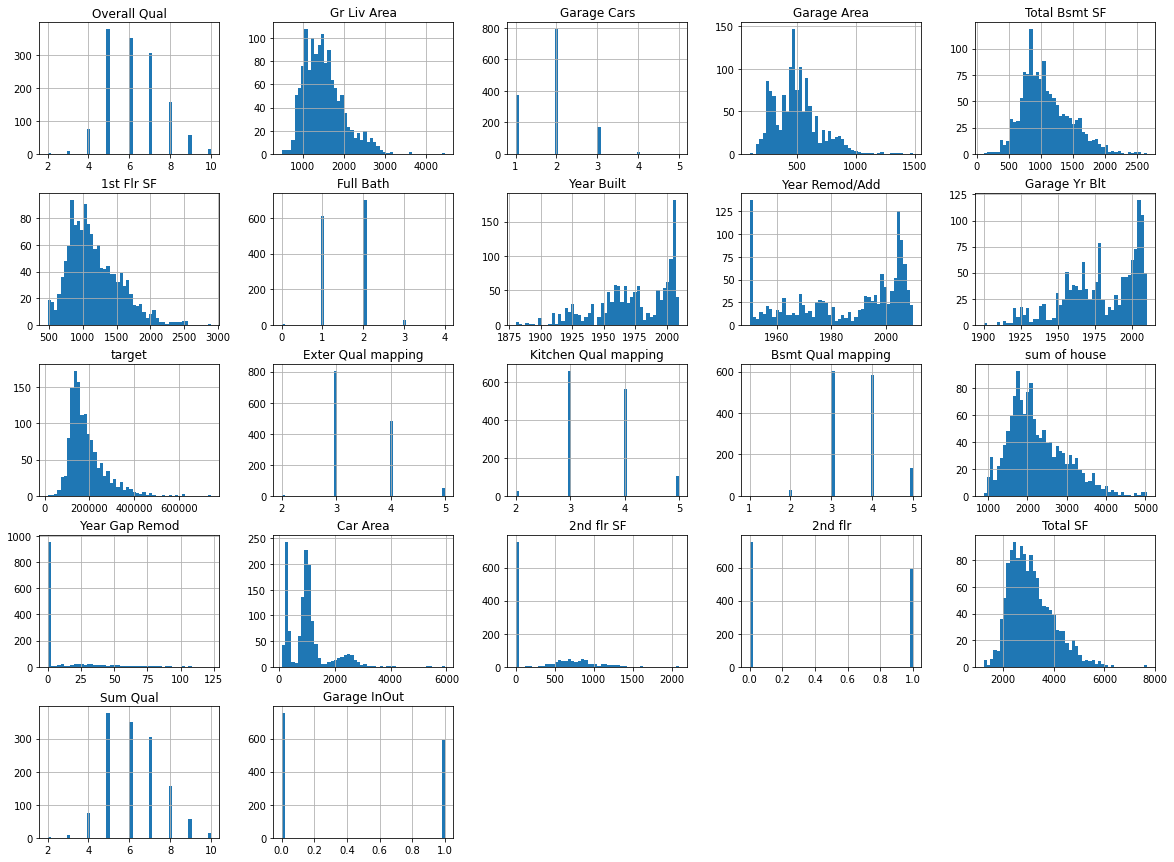

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

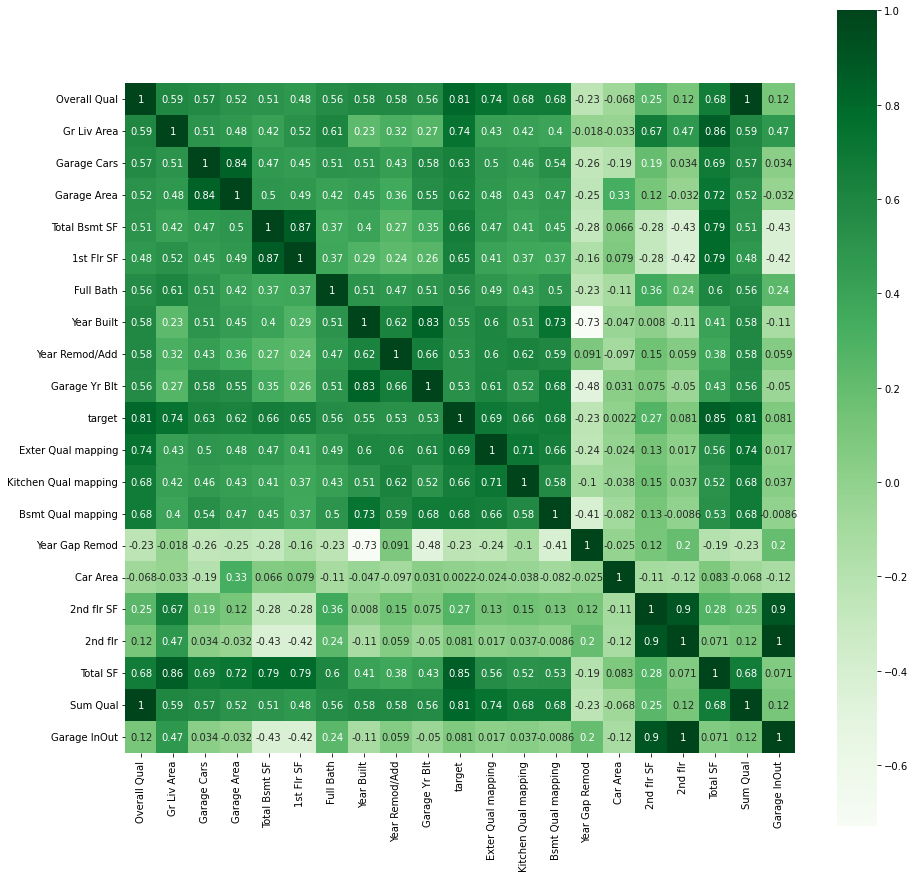

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [ ]:
features = [
  'Overall Qual',
  'Gr Liv Area',
  'Garage Cars',
  'Garage Area',
  'Full Bath',
  'Year Built',
  'Year Remod/Add',
  'Garage Yr Blt',
  # 'sum of house',
  # 'total of house',
  '1st Flr SF',
  'Total Bsmt SF',
  'Year Gap Remod',
  'Car Area',
  '2nd flr SF',
  '2nd flr',
  'Total SF',
  'Sum Qual',
  'Garage InOut',
  # 'target',
]

train_data = train[features]

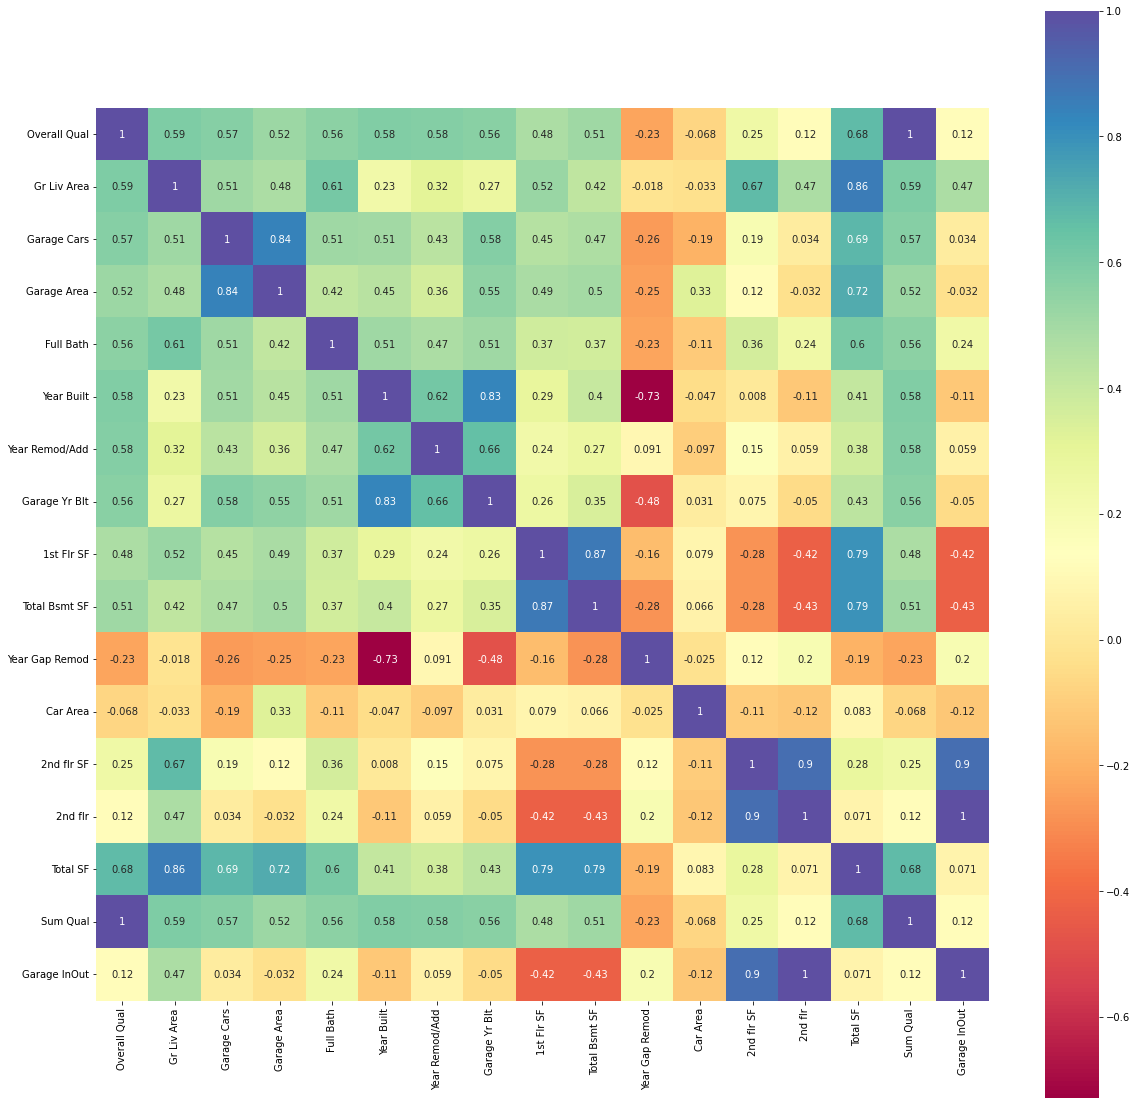

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(), mask=np.zeros_like(train_data.corr(), dtype=bool),
            square=True, annot=True, cmap='Spectral')
plt.show()

In [ ]:
# test.hist(bins=50, figsize=(20,15))
# plt.show()

In [ ]:
X = train_data[features]
Y = train['target']
test_X = test[features]
Y = np.log1p(Y)

In [ ]:
# train 및 test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, test_size=0.1)

In [ ]:
# #성지야 미안 일일히 입력하기 귀찮더라고... score 잘 쓸게.. ^^
# score_List=[]

# model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
# score_List.append(f'KNeighborsRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = LinearRegression().fit(x_train, y_train)
# score_List.append(f'LinearRegression: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = Ridge(random_state=0).fit(x_train, y_train)
# score_List.append(f'Ridge: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = Lasso(random_state=0).fit(x_train, y_train)
# score_List.append(f'Lasso: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'RandomForestRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'GradientBoostingRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = XGBRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'XGBRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = LGBMRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'LGBMRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = AdaBoostRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'AdaBoostRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# model = BaggingRegressor(random_state=0).fit(x_train, y_train)
# score_List.append(f'BaggingRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

# score_List

##### scaleing

In [ ]:
# LogisticRegression(), -> continuous에러 / LogisticRegression
models=[RandomForestRegressor(random_state=0), 
        KNeighborsRegressor(), 
        BaggingRegressor(random_state=0),
        GradientBoostingRegressor(random_state=0), 
        XGBRegressor(random_state=0), 
        LGBMRegressor(random_state=0),
        AdaBoostRegressor(random_state=0), LinearRegression(), 
        SVR(kernel='poly'), SVR(kernel='rbf'), 
        Lasso(random_state=0), Ridge(random_state=0),
        CatBoostRegressor(random_state = 0, loss_function = 'MAE', verbose = 0),
        HuberRegressor(),
        LassoLars(),
        NGBRegressor(random_state = 0, verbose = 0),
        ]
     
model_names=['RandomForestRegressor', 'KNeighborsRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor',
             'AdaBoostRegressor', 'LinearRegression', 'SVR_poly', 'SVR_rbf', 'Lasso', 'Ridge', 'CatBoost', 'Huber', 'NGBoost',
          ]
rmse_list=[]
# d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)

    k=0
    for i in test_pred:
      if i<0:
        test_pred[k] = 0
      k+=1
    nmae = NMAE(np.expm1(test_pred), np.expm1(y_test))
    rmse_list.append((nmae))


for model in range(len(model_names)):
  print('%s RMSE : \t\t %.20f \n'%(model_names[model],  rmse_list[model]))


[13:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s i

RandomForestRegressor RMSE : 		 0.10171539402818831344 

KNeighborsRegressor RMSE : 		 0.14850335560476063401 

BaggingRegressor RMSE : 		 0.10665292318365567070 

GradientBoostingRegressor RMSE : 		 0.10363996357240289059 

XGBRegressor RMSE : 		 0.10382559036878155623 

LGBMRegressor RMSE : 		 0.09407022986708750423 

AdaBoostRegressor RMSE : 		 0.11444180820380678298 

LinearRegression RMSE : 		 0.10532123009569328842 

SVR_poly RMSE : 		 0.12908662763571129850 

SVR_rbf RMSE : 		 0.13792915495507002133 

Lasso RMSE : 		 0.13129882775068421608 

Ridge RMSE : 		 0.10535012950345511162 

CatBoost RMSE : 		 0.09898156964581693307 

Huber RMSE : 		 0.14152810949343783142 

NGBoost RMSE : 		 0.29861282098079999781 



In [ ]:
# [02:05:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
# RandomForestRegressor RMSE : 		 0.09069880236469518575 

# KNeighborsRegressor RMSE : 		 0.11819427867352659545 

# BaggingRegressor RMSE : 		 0.09612379785058719484 

# GradientBoostingRegressor RMSE : 		 0.07851876592077081107 

# XGBRegressor RMSE : 		 0.08010241511372277745 

# LGBMRegressor RMSE : 		 0.09491340054047928132 

# AdaBoostRegressor RMSE : 		 0.12876277086604870359 

# LinearRegression RMSE : 		 0.08396874745053264921 

# SVR_poly RMSE : 		 0.09724084919442893549 

# SVR_rbf RMSE : 		 0.11632414037532801121 

# Lasso RMSE : 		 0.10897605278861685618 

# Ridge RMSE : 		 0.08395944187368885314 

# RandomForestRegressor RMSE : 		 0.08601856191396299589 

# KNeighborsRegressor RMSE : 		 0.13375350448868181252 

# BaggingRegressor RMSE : 		 0.09045448049870306872 

# GradientBoostingRegressor RMSE : 		 0.08539702618551645030 

# XGBRegressor RMSE : 		 0.08045848406690736532 

# LGBMRegressor RMSE : 		 0.08646562548660954861 

# AdaBoostRegressor RMSE : 		 0.11907937689784149626 

# LinearRegression RMSE : 		 0.08340941626720058122 

# SVR_poly RMSE : 		 0.10605971642097161700 

# SVR_rbf RMSE : 		 0.11996503575447800549 

# Lasso RMSE : 		 0.11099385154192795144 

# Ridge RMSE : 		 0.08340524786092293197 

# CatBoost RMSE : 		 0.08084239853910672735 

# Huber RMSE : 		 0.12255893738714239427 

# NGBoost RMSE : 		 0.08416104492773733570 


In [ ]:

model_gbm = GradientBoostingRegressor(random_state=23)
parameters = {
    "n_estimators" : [100,110,120,130,140,150,160,170,180,190,200],
    'max_depth' : [3],
    'learning_rate' : [0.1],
    }

#SVR 모델 Grid Search , 파라메타들은 위에서 설정한 파라메타
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(model_gbm, parameters, verbose=2, cv=5)
grid.fit(X, Y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=110; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=110; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=110; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=110; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_es

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=23),
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]},
             verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
model_gbm = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
model_gbm.score(x_train ,y_train), model_gbm.score(x_test, y_test)

(0.9259033210953017, 0.9001780444971581)

In [ ]:
test_pred=model_gbm.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08581570665773668

In [ ]:
model_gbm = GradientBoostingRegressor(random_state=0, n_estimators=400, max_depth=2, learning_rate=0.05).fit(x_train, y_train)
model_gbm.score(x_train ,y_train), model_gbm.score(x_test, y_test)

(0.9166933772751572, 0.901000552867645)

In [ ]:
test_pred=model_gbm.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08183153526764818

## XGBoost

In [ ]:
model_xgb = XGBRegressor(random_state=0)
parameters = {
    # "n_estimators" : [80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
    #                   310,320,330,340,350,360,400,500,600,700, 800,900,1000],
    # "n_estimators" : [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],        
    'max_depth' : [2,3,4,5],
    # 'min_child_samples': [1,2,3,4,5] ,
    # 'num_leaves': [2,3,4],
    'n_jobs' : [-1],
    'reg_lambda' : [1,2,3,4,5,6],
    'learning_rate' : [0.1, 0.05, 0.01],
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(model_xgb, parameters, verbose=2, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X, Y)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[12:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=2, n_jobs=-1, reg_lambda=1; total time=   0.1s
[12:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=2, n_jobs=-1, reg_lambda=1; total time=   0.1s
[12:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=2, n_jobs=-1, reg_lambda=1; total time=   0.1s
[12:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.1, max_depth=2, n_jobs=-1, reg_lambda=1; total time=   0.1s
[12:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depr

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5], 'n_jobs': [-1],
                         'reg_lambda': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_jobs': -1, 'reg_lambda': 3}

In [ ]:
model_xgb = XGBRegressor(n_jobs = -1,random_state=0).fit(x_train, y_train)
model_xgb.score(x_train, y_train) , model_xgb.score(x_test, y_test)

[12:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9165486590349694, 0.9023246812191212)

In [ ]:
test_pred=model_xgb.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08068061066172202

In [ ]:
model_xgb = XGBRegressor(
    n_estimators=200, n_jobs = -1, max_depth=3, reg_lambda=5,learning_rate=0.1, random_state=0).fit(x_train, y_train)
model_xgb.score(x_train, y_train) , model_xgb.score(x_test, y_test)

[12:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9276301720570299, 0.9060974980746915)

In [ ]:
test_pred=model_xgb.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.07790116937293626

### LGBM

In [ ]:
parameters = {
    "n_estimators" : [80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,],
    # 'num_leaves': [2,3,4,5,6,7,8,9,10],
    'reg_lambda' : [2,3,4,5,6],
    'n_jobs' : [-1],
    'learning_rate': [0.1, 0.05],
    }
    
#verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
#cv=5 5번의 교차검증.
grid = GridSearchCV(LGBMRegressor(random_state=0), parameters, verbose=2, cv=5)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 230 candidates, totalling 1150 fits
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=2; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=2; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=2; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=2; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=2; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=3; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=3; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=3; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=3; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n_jobs=-1, reg_lambda=3; total time=   0.1s
[CV] END learning_rate=0.1, n_estimators=80, n

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05],
                         'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150,
                                          160, 170, 180, 190, 200, 210, 220,
                                          230, 240, 250, 260, 270, 280, 290,
                                          300],
                         'n_jobs': [-1], 'reg_lambda': [2, 3, 4, 5, 6]},
             verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 90, 'n_jobs': -1, 'reg_lambda': 5}

In [ ]:
model_lgbm = LGBMRegressor(n_jobs = -1, random_state=0).fit(x_train, y_train)
model_lgbm.score(x_train, y_train) , model_lgbm.score(x_test, y_test)

(0.9547345002255061, 0.9063003286533882)

In [ ]:
test_pred=model_lgbm.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08732438310046432

In [ ]:
model_lgbm = LGBMRegressor(
    n_estimators= 90, n_jobs = -1, max_depth=3, reg_lambda=5,learning_rate=0.05, random_state=0).fit(x_train, y_train)
model_lgbm.score(x_train, y_train) , model_lgbm.score(x_test, y_test)

(0.8815197083991795, 0.892812350693564)

In [ ]:
test_pred=model_lgbm.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.09204209219649909

### Ridge / Lasso는 성능이 낮음.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV

parameters = {
    "alpha" : [0.1, 0.001, 0.01, 0.0001,1,10,100,1000],
    'max_iter' : [20,30,40,50,60,70,80,90,100,200,300]
    }

grid_lasso = GridSearchCV(LassoLars(random_state = 0), parameters, verbose = 2, cv=5,  scoring='neg_mean_absolute_error')
grid_lasso.fit(x_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=20; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=30; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=30; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=30; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=30; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=30; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=40; total time=   0.0s
[CV] END .............................alpha=0.1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END .............................alpha=0.1, max_iter=50; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=60; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=60; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=60; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=60; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=60; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=70; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=70; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=70; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=70; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=70; total time=   0.0s
[CV] END .............................alpha=0.1, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END .............................alpha=0.1, max_iter=90; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=100; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=100; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=100; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=100; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=100; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=200; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=200; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=200; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=200; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=200; total time=   0.0s
[CV] END ............................alpha=0.1, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ...........................alpha=0.001, max_iter=20; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=30; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=30; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=30; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=30; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=30; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=40; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=40; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=40; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=40; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=40; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=50; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ...........................alpha=0.001, max_iter=60; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=60; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=60; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=70; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=70; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=70; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=70; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=70; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=80; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=80; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=80; total time=   0.0s
[CV] END ...........................alpha=0.001, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ...........................alpha=0.001, max_iter=90; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=100; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=100; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=100; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=100; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=100; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=200; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=200; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=200; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=200; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=200; total time=   0.0s
[CV] END ..........................alpha=0.001, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=20; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=30; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=30; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=30; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=30; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=30; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=40; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=40; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=40; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=40; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ............................alpha=0.01, max_iter=60; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=60; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=60; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=70; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=70; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=70; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=70; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=70; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=80; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=80; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=80; total time=   0.0s
[CV] END ............................alpha=0.01, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ...........................alpha=0.01, max_iter=100; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=100; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=100; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=100; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=200; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=200; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=200; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=200; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=200; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=300; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=300; total time=   0.0s
[CV] END ...........................alpha=0.01, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..........................alpha=0.0001, max_iter=30; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=30; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=30; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=30; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=30; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=40; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=40; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=40; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=40; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=40; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=50; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=50; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..........................alpha=0.0001, max_iter=60; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=60; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=60; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=70; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=70; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=70; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=70; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=70; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=80; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=80; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=80; total time=   0.0s
[CV] END ..........................alpha=0.0001, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..........................alpha=0.0001, max_iter=90; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=100; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=100; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=100; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=100; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=100; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=200; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=200; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=200; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=200; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=200; total time=   0.0s
[CV] END .........................alpha=0.0001, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ...............................alpha=1, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=1, max_iter=40; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..............................alpha=1, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=100; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=1, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..............................alpha=10, max_iter=30; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=30; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=30; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=30; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=30; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=40; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=40; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=40; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=40; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=40; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=50; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=50; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ..............................alpha=10, max_iter=60; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=60; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=70; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=70; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=70; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=70; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=70; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=80; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=80; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=80; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=80; total time=   0.0s
[CV] END ..............................alpha=10, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s


[CV] END .............................alpha=10, max_iter=100; total time=   0.0s
[CV] END .............................alpha=10, max_iter=100; total time=   0.0s
[CV] END .............................alpha=10, max_iter=200; total time=   0.0s
[CV] END .............................alpha=10, max_iter=200; total time=   0.0s
[CV] END .............................alpha=10, max_iter=200; total time=   0.0s
[CV] END .............................alpha=10, max_iter=200; total time=   0.0s
[CV] END .............................alpha=10, max_iter=200; total time=   0.0s
[CV] END .............................alpha=10, max_iter=300; total time=   0.0s
[CV] END .............................alpha=10, max_iter=300; total time=   0.0s
[CV] END .............................alpha=10, max_iter=300; total time=   0.0s
[CV] END .............................alpha=10, max_iter=300; total time=   0.0s
[CV] END .............................alpha=10, max_iter=300; total time=   0.0s
[CV] END ..................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END .............................alpha=100, max_iter=30; total time=   0.0s
[CV] END .............................alpha=100, max_iter=30; total time=   0.0s
[CV] END .............................alpha=100, max_iter=30; total time=   0.0s
[CV] END .............................alpha=100, max_iter=40; total time=   0.0s
[CV] END .............................alpha=100, max_iter=40; total time=   0.0s
[CV] END .............................alpha=100, max_iter=40; total time=   0.0s
[CV] END .............................alpha=100, max_iter=40; total time=   0.0s
[CV] END .............................alpha=100, max_iter=40; total time=   0.0s
[CV] END .............................alpha=100, max_iter=50; total time=   0.0s
[CV] END .............................alpha=100, max_iter=50; total time=   0.0s
[CV] END .............................alpha=100, max_iter=50; total time=   0.0s
[CV] END .............................alpha=100, max_iter=50; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s


[CV] END .............................alpha=100, max_iter=70; total time=   0.0s
[CV] END .............................alpha=100, max_iter=70; total time=   0.0s
[CV] END .............................alpha=100, max_iter=70; total time=   0.0s
[CV] END .............................alpha=100, max_iter=70; total time=   0.0s
[CV] END .............................alpha=100, max_iter=80; total time=   0.0s
[CV] END .............................alpha=100, max_iter=80; total time=   0.0s
[CV] END .............................alpha=100, max_iter=80; total time=   0.0s
[CV] END .............................alpha=100, max_iter=80; total time=   0.0s
[CV] END .............................alpha=100, max_iter=80; total time=   0.0s
[CV] END .............................alpha=100, max_iter=90; total time=   0.0s
[CV] END .............................alpha=100, max_iter=90; total time=   0.0s
[CV] END .............................alpha=100, max_iter=90; total time=   0.0s
[CV] END ..................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ............................alpha=100, max_iter=100; total time=   0.0s
[CV] END ............................alpha=100, max_iter=100; total time=   0.0s
[CV] END ............................alpha=100, max_iter=100; total time=   0.0s
[CV] END ............................alpha=100, max_iter=200; total time=   0.0s
[CV] END ............................alpha=100, max_iter=200; total time=   0.0s
[CV] END ............................alpha=100, max_iter=200; total time=   0.0s
[CV] END ............................alpha=100, max_iter=200; total time=   0.0s
[CV] END ............................alpha=100, max_iter=200; total time=   0.0s
[CV] END ............................alpha=100, max_iter=300; total time=   0.0s
[CV] END ............................alpha=100, max_iter=300; total time=   0.0s
[CV] END ............................alpha=100, max_iter=300; total time=   0.0s
[CV] END ............................alpha=100, max_iter=300; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ............................alpha=1000, max_iter=30; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=30; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=30; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=30; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=30; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=40; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=40; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=40; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=40; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=40; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=50; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=50; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

[CV] END ............................alpha=1000, max_iter=60; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=60; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=60; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=70; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=70; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=70; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=70; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=70; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=80; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=80; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=80; total time=   0.0s
[CV] END ............................alpha=1000, max_iter=80; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

GridSearchCV(cv=5, estimator=LassoLars(random_state=0),
             param_grid={'alpha': [0.1, 0.001, 0.01, 0.0001, 1, 10, 100, 1000],
                         'max_iter': [20, 30, 40, 50, 60, 70, 80, 90, 100, 200,
                                      300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid_lasso.best_params_

{'alpha': 0.0001, 'max_iter': 20}

In [ ]:
model_las = LassoLars(alpha=0.0001, max_iter=20).fit(x_train, y_train)
model_las.score(x_train, y_train) , model_las.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


(0.8493915231104613, 0.9046685871790827)

In [ ]:
test_pred=model_las.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08366819399997963

In [ ]:
model_las = Lasso().fit(x_train, y_train)
model_las.score(x_train, y_train) , model_las.score(x_test, y_test)

(0.7852061987053692, 0.8389990772966317)

In [ ]:
test_pred=model_las.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.11126720295253485

In [ ]:
model_las = Lasso(alpha= 0.0001, max_iter = 20).fit(x_train, y_train)
model_las.score(x_train, y_train) , model_las.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+01, tolerance: 1.799e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(0.8496599236445295, 0.9106674834836245)

In [ ]:
test_pred=model_las.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08196343497672649

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {
    "alpha" : [0.1, 0.01,0.001, 0.0001,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000],
    'max_iter' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400]
    }

grid_ridge = GridSearchCV(Ridge(random_state = 0), parameters, verbose = 2, cv=5, scoring='neg_mean_absolute_error' )
grid_ridge.fit(X, Y)

Fitting 5 folds for each of 726 candidates, totalling 3630 fits
[CV] END ..............................alpha=0.1, max_iter=1; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=1; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=1; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=1; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=1; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=2; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=2; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=2; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=2; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=2; total time=   0.0s
[CV] END ..............................alpha=0.1, max_iter=3; total time=   0.0s
[CV] END ..............................alpha=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

[CV] END ................................alpha=0, max_iter=2; total time=   0.0s
[CV] END ................................alpha=0, max_iter=3; total time=   0.0s
[CV] END ................................alpha=0, max_iter=3; total time=   0.0s
[CV] END ................................alpha=0, max_iter=3; total time=   0.0s
[CV] END ................................alpha=0, max_iter=3; total time=   0.0s
[CV] END ................................alpha=0, max_iter=3; total time=   0.0s
[CV] END ................................alpha=0, max_iter=4; total time=   0.0s
[CV] END ................................alpha=0, max_iter=4; total time=   0.0s
[CV] END ................................alpha=0, max_iter=4; total time=   0.0s
[CV] END ................................alpha=0, max_iter=4; total time=   0.0s
[CV] END ................................alpha=0, max_iter=4; total time=   0.0s
[CV] END ................................alpha=0, max_iter=5; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

[CV] END ................................alpha=0, max_iter=5; total time=   0.0s
[CV] END ................................alpha=0, max_iter=6; total time=   0.0s
[CV] END ................................alpha=0, max_iter=6; total time=   0.0s
[CV] END ................................alpha=0, max_iter=6; total time=   0.0s
[CV] END ................................alpha=0, max_iter=6; total time=   0.0s
[CV] END ................................alpha=0, max_iter=6; total time=   0.0s
[CV] END ................................alpha=0, max_iter=7; total time=   0.0s
[CV] END ................................alpha=0, max_iter=7; total time=   0.0s
[CV] END ................................alpha=0, max_iter=7; total time=   0.0s
[CV] END ................................alpha=0, max_iter=7; total time=   0.0s
[CV] END ................................alpha=0, max_iter=7; total time=   0.0s
[CV] END ................................alpha=0, max_iter=8; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

[CV] END ................................alpha=0, max_iter=8; total time=   0.0s
[CV] END ................................alpha=0, max_iter=9; total time=   0.0s
[CV] END ................................alpha=0, max_iter=9; total time=   0.0s
[CV] END ................................alpha=0, max_iter=9; total time=   0.0s
[CV] END ................................alpha=0, max_iter=9; total time=   0.0s
[CV] END ................................alpha=0, max_iter=9; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=10; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=20; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

[CV] END ...............................alpha=0, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=20; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=30; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=40; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

[CV] END ...............................alpha=0, max_iter=40; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=50; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=50; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=50; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=50; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=50; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=60; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=60; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=60; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=60; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=60; total time=   0.0s
[CV] END ...............................alpha=0, max_iter=70; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio


[CV] END ..............................alpha=0, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=200; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=300; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=400; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=400; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=400; total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6786e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64849e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio


[CV] END ..............................alpha=0, max_iter=400; total time=   0.0s
[CV] END ..............................alpha=0, max_iter=400; total time=   0.0s
[CV] END ................................alpha=1, max_iter=1; total time=   0.0s
[CV] END ................................alpha=1, max_iter=1; total time=   0.0s
[CV] END ................................alpha=1, max_iter=1; total time=   0.0s
[CV] END ................................alpha=1, max_iter=1; total time=   0.0s
[CV] END ................................alpha=1, max_iter=1; total time=   0.0s
[CV] END ................................alpha=1, max_iter=2; total time=   0.0s
[CV] END ................................alpha=1, max_iter=2; total time=   0.0s
[CV] END ................................alpha=1, max_iter=2; total time=   0.0s
[CV] END ................................alpha=1, max_iter=2; total time=   0.0s
[CV] END ................................alpha=1, max_iter=2; total time=   0.0s
[CV] END ..................

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 0, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100, 200, 300, 400, 500, 600, 700, ...],
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                      50, 60, 70, 80, 90, 100, 200, 300, 400]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid_ridge.best_params_

{'alpha': 100, 'max_iter': 1}

In [ ]:
model_ri = Ridge().fit(x_train, y_train)
model_ri.score(x_train, y_train) , model_ri.score(x_test, y_test)

(0.8513222059667166, 0.9080793564128)

In [ ]:
test_pred=model_ri.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08340416700779889

In [ ]:
model_ri = Ridge(alpha=1).fit(x_train, y_train)
model_ri.score(x_train, y_train) , model_ri.score(x_test, y_test)

(0.8513222059667166, 0.9080793564128)

In [ ]:
test_pred=model_ri.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08340416700779889

### CatBoost

In [ ]:
from catboost import CatBoostRegressor, Pool
model_CB = CatBoostRegressor(random_state = 0, loss_function = 'MAE', verbose = 2)
# model_CB = CatBoostRegressor(random_state = 0, loss_function = 'MAE', verbose = 2)


In [ ]:
model_CB.fit(x_train, y_train)

0:	learn: 0.2912051	total: 5.01ms	remaining: 5.01s
2:	learn: 0.2775449	total: 17ms	remaining: 5.66s
4:	learn: 0.2654351	total: 21.6ms	remaining: 4.29s
6:	learn: 0.2544152	total: 26.1ms	remaining: 3.69s
8:	learn: 0.2438234	total: 30.5ms	remaining: 3.36s
10:	learn: 0.2342825	total: 35.1ms	remaining: 3.16s
12:	learn: 0.2253302	total: 39.6ms	remaining: 3.01s
14:	learn: 0.2175068	total: 44.9ms	remaining: 2.95s
16:	learn: 0.2096445	total: 50.9ms	remaining: 2.94s
18:	learn: 0.2023318	total: 55.9ms	remaining: 2.89s
20:	learn: 0.1957044	total: 60.8ms	remaining: 2.83s
22:	learn: 0.1895274	total: 65.7ms	remaining: 2.79s
24:	learn: 0.1838005	total: 70.5ms	remaining: 2.75s
26:	learn: 0.1783837	total: 75.1ms	remaining: 2.71s
28:	learn: 0.1733167	total: 80ms	remaining: 2.68s
30:	learn: 0.1684462	total: 84.8ms	remaining: 2.65s
32:	learn: 0.1639613	total: 90ms	remaining: 2.64s
34:	learn: 0.1596519	total: 94.8ms	remaining: 2.61s
36:	learn: 0.1554028	total: 99.9ms	remaining: 2.6s
38:	learn: 0.1517684	tot

In [ ]:
cb_pred = model_CB.predict(x_test)
NMAE(np.expm1(cb_pred),np.expm1(y_test))

0.08042006548175376

###         NGBRegressor(random_state = 0, verbose = 0),`

In [ ]:
model_ngb = NGBRegressor(random_state = 0, n_estimators=3000, learning_rate=0.01, verbose = 2).fit(x_train, y_train)
model_ngb.score(x_train, y_train) , model_ngb.score(x_test, y_test)

[iter 0] loss=0.4642 val_loss=0.0000 scale=1.0000 norm=0.6343
[iter 100] loss=-0.2487 val_loss=0.0000 scale=2.0000 norm=0.8800
[iter 200] loss=-0.7277 val_loss=0.0000 scale=2.0000 norm=0.8477
[iter 300] loss=-0.8792 val_loss=0.0000 scale=1.0000 norm=0.4465
[iter 400] loss=-0.9350 val_loss=0.0000 scale=2.0000 norm=0.9120
[iter 500] loss=-0.9686 val_loss=0.0000 scale=1.0000 norm=0.4587
[iter 600] loss=-0.9951 val_loss=0.0000 scale=1.0000 norm=0.4562
[iter 700] loss=-1.0181 val_loss=0.0000 scale=1.0000 norm=0.4532
[iter 800] loss=-1.0400 val_loss=0.0000 scale=1.0000 norm=0.4495
[iter 900] loss=-1.0628 val_loss=0.0000 scale=1.0000 norm=0.4461
[iter 1000] loss=-1.0842 val_loss=0.0000 scale=2.0000 norm=0.8857
[iter 1100] loss=-1.1054 val_loss=0.0000 scale=1.0000 norm=0.4401
[iter 1200] loss=-1.1284 val_loss=0.0000 scale=0.5000 norm=0.2173
[iter 1300] loss=-1.1498 val_loss=0.0000 scale=1.0000 norm=0.4304
[iter 1400] loss=-1.1694 val_loss=0.0000 scale=1.0000 norm=0.4277
[iter 1500] loss=-1.188

(-1.3819358093292216, 0.6058342702165233)

In [ ]:
test_pred=model_ngb.predict(x_test)
NMAE(np.expm1(test_pred),np.expm1(y_test))

0.08511486878102974

In [ ]:
# model_ngb = NGBRegressor(random_state = 0, verbose = 0)
# parameters = {
#     "n_estimators" : [500,1000,2000,3000,4000,5000],
#     #                   310,320,330,340,350,360,400,500,600,700, 800,900,1000],
#     # "n_estimators" : [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],        
#         # 'min_child_samples': [1,2,3,4,5] ,
#     # 'num_leaves': [2,3,4],
#     # 'n_jobs' : [-1],
#     # 'reg_lambda' : [1,2,3,4,5,6],
#     'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05]
#     }
    
# #verbose = 2 -> Grid Search 반복시 하이퍼 파라메타별 메시지를 화면에 출력 
# #cv=5 5번의 교차검증.
# grid = GridSearchCV(model_ngb, parameters, verbose=2, cv=5)
# grid.fit(x_train, y_train)

### K Fold

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

nmae_score = make_scorer(NMAE, greater_is_better=False)

In [ ]:
# # results = cross_val_score(XGBRegressor(n_estimators=190, n_jobs = -1, max_depth=3, reg_lambda=1,learning_rate=0.1, random_state=0), X, Y, cv=kf)
# # results.mean() , results
# results = cross_val_score(CatBoostRegressor(random_state = 0, loss_function = 'MAE', verbose = 0), X, Y, cv=kf)
# results.mean(), results

# results = cross_val_score(NGBRegressor(random_state = 0, n_estimators=1000, learning_rate=0.01, verbose = 2), X, Y, cv=kf)
# results.mean(), results

# results = cross_val_score(GradientBoostingRegressor(random_state=0, n_estimators=110, max_depth=3, learning_rate=0.1), X, Y, cv=kf)
# results.mean(), results

In [ ]:
features = X
label = Y
TEST_DATA = test_X
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
n_iter = 0
sum = 0
test_pred = 0
Ri_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = Ridge(random_state=0)
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  Ri_pred += test_pred/10
  


print("\n", sum/10)

1 번째 정확도 0.09239345053375533 

2 번째 정확도 0.1071715485488495 

3 번째 정확도 0.09273054869566365 

4 번째 정확도 0.12745887638000816 

5 번째 정확도 0.08431622361138906 

6 번째 정확도 0.10551096851728317 

7 번째 정확도 0.09729255167047404 

8 번째 정확도 0.09222436593507763 

9 번째 정확도 0.10101106564852635 

10 번째 정확도 0.09930194829229874 


 0.09994115478333257


In [ ]:
n_iter = 0
sum = 0
test_pred = 0
Li_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = LinearRegression(normalize=True)
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  Li_pred += test_pred/10
  


print("\n", sum/10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

1 번째 정확도 0.09339027695836645 

2 번째 정확도 0.1065696346872668 

3 번째 정확도 0.09427624722835193 

4 번째 정확도 0.12738685485119 

5 번째 정확도 0.0842892463853594 

6 번째 정확도 0.10707343464546451 

7 번째 정확도 0.09962633687871965 

8 번째 정확도 0.09221773073301587 

9 번째 정확도 0.10098422202969154 

10 번째 정확도 0.09977110174026767 


 0.10055850861376939


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
n_iter = 0
sum = 0
test_pred = 0
las_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = Lasso(alpha= 0.0001, max_iter = 20,random_state=0)
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  las_pred += test_pred/10
  


print("\n", sum/10)

1 번째 정확도 0.10462743786815633 

2 번째 정확도 0.10327863036116357 

3 번째 정확도 0.09734407699668735 

4 번째 정확도 0.10756014221018904 

5 번째 정확도 0.10254579663354119 

6 번째 정확도 0.09740640727334257 

7 번째 정확도 0.10745526414370601 

8 번째 정확도 0.09316278396411752 

9 번째 정확도 0.08377869566525384 

10 번째 정확도 0.09772060408146235 


 0.09948798391976198


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+01, tolerance: 1.821e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+01, tolerance: 1.827e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
np.expm1(Ri_pred)

array([321614.87116436, 130329.96206978, 171335.35229064, ...,
        91948.79676559, 179275.43669632, 143714.54616648])

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# n_iter = 0
# sum = 0
# test_pred = 0
# GBR_pred = 0

# for train_index, val_index in kfold.split(features):
#   x_train, x_val = features.iloc[train_index], features.iloc[val_index]
#   y_train, y_val = label.iloc[train_index], label.iloc[val_index]

#   model = HuberRegressor()
#   model.fit(x_train, y_train)
#   pred = model.predict(x_val)
#   n_iter+=1

#   nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
#   sum += nmae
#   train_size = x_train.shape[0]
#   test_size = x_test.shape[0]

#   print(n_iter , "번째 정확도", nmae , "\n")

#   test_pred = model.predict(TEST_DATA)
#   GBR_pred += test_pred/10
  


# print("\n", sum/10)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
n_iter = 0
sum = 0
test_pred = 0
GBR_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = GradientBoostingRegressor(random_state=0, n_estimators=500, max_depth=2, learning_rate=0.05)
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  GBR_pred += test_pred/10
  


print("\n", sum/10)

1 번째 정확도 0.09901410647950268 

2 번째 정확도 0.09571285396375741 

3 번째 정확도 0.09402237576091046 

4 번째 정확도 0.1011156893618522 

5 번째 정확도 0.09867769285693323 

6 번째 정확도 0.10391893573887806 

7 번째 정확도 0.11651051334035291 

8 번째 정확도 0.09574601427282964 

9 번째 정확도 0.09365395093813111 

10 번째 정확도 0.10385398558132215 


 0.10022261182944699


In [ ]:
GBR_pred

array([12.75151168, 11.75051274, 12.05642656, ..., 11.32830777,
       12.12381571, 11.80969049])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
n_iter = 0
sum=0
test_pred = 0
XGB_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = XGBRegressor(
    n_estimators=200, n_jobs = -1, max_depth=3, reg_lambda=4,learning_rate=0.1, random_state=0)
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  XGB_pred += test_pred/10


print("\n", sum/10)

[13:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 번째 정확도 0.0962027773897682 

[13:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 번째 정확도 0.09557248387159552 

[13:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 번째 정확도 0.0925874258042813 

[13:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4 번째 정확도 0.10200242151570707 

[13:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 번째 정확도 0.0983128655616363 

[13:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6 번째 정확도 0.11146096484540399 

[13:18:46] WARNING: /workspace/src/objective/regression

In [ ]:
XGB_pred

array([12.74171 , 11.770473, 12.039579, ..., 11.303676, 12.141073,
       11.810584], dtype=float32)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
n_iter = 0
sum=0
test_pred = 0
CB_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = (CatBoostRegressor(random_state = 0, loss_function = 'MAE', n_estimators= 1200, learning_rate=0.02, verbose = 0))
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  CB_pred += test_pred/10


print("\n", sum/10)

1 번째 정확도 0.09752553053043186 

2 번째 정확도 0.0930498196604309 

3 번째 정확도 0.09466179765895502 

4 번째 정확도 0.09824963534876555 

5 번째 정확도 0.09022938237276824 

6 번째 정확도 0.10928212259188572 

7 번째 정확도 0.10255137213220357 

8 번째 정확도 0.0879536819950569 

9 번째 정확도 0.08534322030170312 

10 번째 정확도 0.08850532796212865 


 0.09473518905543296


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
n_iter = 0
sum=0
test_pred = 0
NGB_pred = 0

for train_index, val_index in kfold.split(features):
  x_train, x_val = features.iloc[train_index], features.iloc[val_index]
  y_train, y_val = label.iloc[train_index], label.iloc[val_index]

  model = (NGBRegressor(random_state = 0, n_estimators=600, learning_rate = 0.01,verbose = 1))
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  n_iter+=1

  nmae = (NMAE(np.expm1(y_val), np.expm1(pred)))
  sum += nmae
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  test_pred

  print(n_iter , "번째 정확도", nmae , "\n")

  test_pred = model.predict(TEST_DATA)
  NGB_pred += test_pred/10


print("\n", sum/10)

[iter 0] loss=0.4703 val_loss=0.0000 scale=1.0000 norm=0.6324
[iter 100] loss=-0.2395 val_loss=0.0000 scale=2.0000 norm=0.8741
[iter 200] loss=-0.7319 val_loss=0.0000 scale=2.0000 norm=0.8380
[iter 300] loss=-0.8947 val_loss=0.0000 scale=1.0000 norm=0.4394
[iter 400] loss=-0.9501 val_loss=0.0000 scale=1.0000 norm=0.4496
[iter 500] loss=-0.9840 val_loss=0.0000 scale=1.0000 norm=0.4512
1 번째 정확도 0.10133458805031037 

[iter 0] loss=0.4721 val_loss=0.0000 scale=1.0000 norm=0.6357
[iter 100] loss=-0.2332 val_loss=0.0000 scale=2.0000 norm=0.8795
[iter 200] loss=-0.7312 val_loss=0.0000 scale=2.0000 norm=0.8421
[iter 300] loss=-0.8940 val_loss=0.0000 scale=1.0000 norm=0.4428
[iter 400] loss=-0.9457 val_loss=0.0000 scale=1.0000 norm=0.4557
[iter 500] loss=-0.9791 val_loss=0.0000 scale=1.0000 norm=0.4585
2 번째 정확도 0.09785847022659941 

[iter 0] loss=0.4660 val_loss=0.0000 scale=1.0000 norm=0.6351
[iter 100] loss=-0.2449 val_loss=0.0000 scale=2.0000 norm=0.8834
[iter 200] loss=-0.7314 val_loss=0.00

In [ ]:
# total_pred = (NGB_pred + XGB_pred + CB_pred + GBR_pred + Ri_pred)/5
total_pred = CB_pred * 0.8 + NGB_pred * 0.2
total_pred = np.expm1(total_pred)
total_pred

array([333733.2291563 , 127709.55867221, 175627.06515057, ...,
        81023.34564779, 183208.86699027, 137953.61591753])

In [ ]:
# rf_pred = np.zeros(target.shape[0])
# rf_val = []
# for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
#     print(f'{n + 1} FOLD Training.....')
#     tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
#     val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
#     rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
#     rf.fit(tr_x, tr_y)
    
#     val_pred = np.expm1(rf.predict(val_x))
#     val_nmae = NMAE(val_y, val_pred)
#     rf_val.append(val_nmae)
#     print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
#     fold_pred = rf.predict(target) / 10
#     rf_pred += fold_pred
# print(f'10FOLD Mean of NMAE = {np.mean(rf_val)} & std = {np.std(rf_val)}')

## 최종 제출

In [ ]:
# model_xgb = XGBRegressor(n_estimators=190, n_jobs = -1, max_depth=3, reg_lambda=1,learning_rate=0.1, random_state=0).fit(X, Y)
# # model_gbm = GradientBoostingRegressor(random_state=0, n_estimators=90, max_depth=3, learning_rate=0.1).fit(X, Y)
# # model_lgbm = LGBMRegressor(n_estimators= 110, n_jobs = -1, max_depth=3, reg_lambda=6,learning_rate=0.05, random_state=0).fit(X, Y)
# # model_ri = Ridge(alpha=100).fit(X, Y)
# # model_las = Lasso(alpha= 0.000001, max_iter = 90).fit(X, Y)
# model_CB = CatBoostRegressor(depth = 5, random_state = 0, loss_function = 'MAE', n_estimators = 10000, learning_rate = 0.02, verbose = 0).fit(X,Y)


# # model_xgb = XGBRegressor(n_estimators=250, n_jobs = -1, max_depth=3, reg_lambda=1,learning_rate=0.1, random_state=0).fit(x_train, y_train)
# # # model_gbm = GradientBoostingRegressor(random_state=0, n_estimators=90, max_depth=3, learning_rate=0.1).fit(X, Y)
# # # model_lgbm = LGBMRegressor(n_estimators= 110, n_jobs = -1, max_depth=3, reg_lambda=6,learning_rate=0.05, random_state=0).fit(X, Y)
# # # model_ri = Ridge(alpha=100).fit(X, Y)
# # # model_las = Lasso(alpha= 0.000001, max_iter = 90).fit(X, Y)
# # model_CB = CatBoostRegressor(depth = 5, random_state = 0, loss_function = 'MAE', n_estimators = 10000, learning_rate = 0.02, verbose = 0).fit(x_train, y_train)

In [ ]:
# xgb_pred = model_xgb.predict(x_test)
# # gbm_pred = model_gbm.predict(x_test)
# # lgbm_pred = model_lgbm.predict(x_test)
# # ri_pred = model_ri.predict(x_test)
# # las_pred = model_las.predict(x_test)
# cb_pred = model_CB.predict(x_test)

In [ ]:
# min = 100000000000
# index= -1

# for i in range(0,11):
#   sum = cb_pred * ((float)(i/10)) + NGB_pred * (float((10-i)/10))
  
#   print("sum is : " , (NMAE(np.expm1(sum), np.expm1(y_test))) , "\n")
#   if((NMAE(np.expm1(sum), np.expm1(y_test))) < min):
#     min = (NMAE(np.expm1(sum), np.expm1(y_test)))
#     index=i

# print(index , "and value is : ", min)

ValueError: ignored

In [ ]:
# xgb_pred = model_xgb.predict(test_X)
# # gbm_pred = model_gbm.predict(test_X)
# # lgbm_pred = model_lgbm.predict(test_X)
# # ri_pred = model_ri.predict(test_X)
# # las_pred = model_las.predict(test_X)
# cb_pred = model_CB.predict(test_X)

In [ ]:
# # test_pred = ri_pred * 0.2 + xgb_pred *0.2 + gbm_pred*0.2 + lgbm_pred * 0.2 + las_pred * 0.2
# # test_pred = xgb_pred * 0.7 + gbm_pred*0.3 * + (Use Ex EQ) + scoring x

# test_pred = xgb_pred *0.2 + cb_pred * 0.8
# test_pred = np.expm1(test_pred)

In [ ]:
total_pred = pd.DataFrame(total_pred)
total_pred = np.round(total_pred)
total_pred

,0
0,333733.0
1,127710.0
2,175627.0
3,247750.0
4,135946.0
...,...
1345,322631.0
1346,124210.0
1347,81023.0
1348,183209.0


In [ ]:
# test_pred = pd.DataFrame(test_pred)
# test_pred = np.round(test_pred)
# test_pred

In [ ]:
sample_submission = pd.read_csv('/content/data/sample_submission.csv')
sample_submission.loc[:, 'target'] = total_pred.loc[:, 0]
sample_submission

,id,target
0,1,333733.0
1,2,127710.0
2,3,175627.0
3,4,247750.0
4,5,135946.0
...,...,...
1345,1346,322631.0
1346,1347,124210.0
1347,1348,81023.0
1348,1349,183209.0


In [ ]:
#케글에 업로드하며 수치 확인하기 위해 csv 확인으로 변환.
sample_submission.to_csv('house_11.csv', index=False)

In [ ]:
# features = [
#   'Overall Qual',
#   'Gr Liv Area',
#   # 'Garage Cars',
#   'Garage Area',
#   'Full Bath',
#   'Year Built',
#   'Year Remod/Add',
#   'Garage Yr Blt',
#   'sum of house',
#   # '1st Flr SF',
#   # 'Total Bsmt SF',
  # 'target',
#   'EQ_Ex',
#   # 'EQ_Fa',
#   'EQ_Gd',
#   'EQ_TA',
#   'KQ_Ex',
#   # 'KQ_Fa',
#   # 'KQ_Gd',
#   'KQ_TA',
#   'BQ_Ex',
#   # 'BQ_Fa',
#   # 'BQ_Gd',
#   # 'BQ_Po',	
#   'BQ_TA',
# ]
# features